Датасет о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Нужно предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

## Часть 1. Анализ и предобработка данных

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 65.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 4.40MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_train = pd.read_csv("/content/game_of_thrones_train.csv", index_col='S.No')
data_test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')
data_train.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [ ]:
data_train.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [ ]:
data_train.drop(['name', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
            'mother', 'father', 'heir', 'house', 'spouse'], axis=1, inplace=True)
data_test.drop(['name', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
            'mother', 'father', 'heir', 'house', 'spouse'], axis=1, inplace=True)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             717 non-null    object 
 1   male              1557 non-null   int64  
 2   culture           488 non-null    object 
 3   dateOfBirth       279 non-null    float64
 4   book1             1557 non-null   int64  
 5   book2             1557 non-null   int64  
 6   book3             1557 non-null   int64  
 7   book4             1557 non-null   int64  
 8   book5             1557 non-null   int64  
 9   isMarried         1557 non-null   int64  
 10  isNoble           1557 non-null   int64  
 11  age               279 non-null    float64
 12  numDeadRelations  1557 non-null   int64  
 13  popularity        1557 non-null   float64
 14  isAlive           1557 non-null   int64  
dtypes: float64(3), int64(10), object(2)
memory usage: 194.6+ KB


In [ ]:
data_train['title'].value_counts()

,count
title,
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
...,...
Sweetport Sound,1
Lord of Greyshield,1
Felwood,1


In [ ]:
data_train['culture'].value_counts()

,count
culture,
Northmen,94
Ironborn,91
Free Folk,45
Braavosi,39
Valyrian,28
Dothraki,17
Ghiscari,17
Dornish,17
Reach,13


In [ ]:
data_train['title'].fillna('None', inplace=True)
data_test['title'].fillna('None', inplace=True)
data_train['culture'].fillna('None', inplace=True)
data_test['culture'].fillna('None', inplace=True)
data_train['dateOfBirth'].fillna(data_train['dateOfBirth'].mode()[0], inplace=True)
data_test['dateOfBirth'].fillna(data_test['dateOfBirth'].mode()[0], inplace=True)
data_train['age'].fillna(data_train['age'].mode()[0], inplace=True)
data_test['age'].fillna(data_test['age'].mode()[0], inplace=True)
#data['book'] = data[book_1] + data[book_2] + data[book_3] + data[book_4] + data[book_5]
#data.drop(['book_1', 'book_2', 'book_3', 'book_4', 'book_5'], axis=1, inplace=True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1557 non-null   object 
 1   male              1557 non-null   int64  
 2   culture           1557 non-null   object 
 3   dateOfBirth       1557 non-null   float64
 4   book1             1557 non-null   int64  
 5   book2             1557 non-null   int64  
 6   book3             1557 non-null   int64  
 7   book4             1557 non-null   int64  
 8   book5             1557 non-null   int64  
 9   isMarried         1557 non-null   int64  
 10  isNoble           1557 non-null   int64  
 11  age               1557 non-null   float64
 12  numDeadRelations  1557 non-null   int64  
 13  popularity        1557 non-null   float64
 14  isAlive           1557 non-null   int64  
dtypes: float64(3), int64(10), object(2)
memory usage: 194.6+ KB


<ipython-input-32-a86027b3f1ef>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['title'].fillna('None', inplace=True)
<ipython-input-32-a86027b3f1ef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Создадим новые признаки


In [ ]:
data_train['isPopular'] = (data_train['popularity'] > 0.5).astype(int)
data_train['boolDeadRelations'] = (data_train['numDeadRelations'] > 0).astype(int)
data_test['isPopular'] = (data_test['popularity'] > 0.5).astype(int)
data_test['boolDeadRelations'] = (data_test['numDeadRelations'] > 0).astype(int)
data_train['death'] = ((data_train['age'] + data_train['dateOfBirth']) >= 305.).astype(int)
data_test['death'] = ((data_test['age'] + data_test['dateOfBirth']) >= 305.).astype(int)
data_train.drop(['popularity', 'numDeadRelations'], axis=1, inplace=True)
data_test.drop(['popularity', 'numDeadRelations'], axis=1, inplace=True)

In [ ]:
data_train['book'] = data_train['book1'] + data_train['book2'] + data_train['book3'] + data_train['book4'] + data_train['book5']
data_test['book'] = data_test['book1'] + data_test['book2'] + data_test['book3'] + data_test['book4'] + data_test['book5']

In [ ]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   object 
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   object 
 3   dateOfBirth        1557 non-null   float64
 4   book1              1557 non-null   int64  
 5   book2              1557 non-null   int64  
 6   book3              1557 non-null   int64  
 7   book4              1557 non-null   int64  
 8   book5              1557 non-null   int64  
 9   isMarried          1557 non-null   int64  
 10  isNoble            1557 non-null   int64  
 11  age                1557 non-null   float64
 12  isAlive            1557 non-null   int64  
 13  isPopular          1557 non-null   int64  
 14  boolDeadRelations  1557 non-null   int64  
 15  death              1557 non-null   int64  
 16  book               1557 non-n

In [ ]:

def func(x):
  for name, variants in cult.items():
    if x.lower() in variants:
      return name
  return x



cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
data_train['simple_culture'] = data_train['culture'].apply(func)
data_test['simple_culture'] = data_test['culture'].apply(func)

In [ ]:
data_train.drop(['culture'], axis=1, inplace=True)
data_test.drop(['culture'], axis=1, inplace=True)

Проанализируем, какие столбцы являются существенными и влияют на предсказание, а какие нет.

<Axes: >

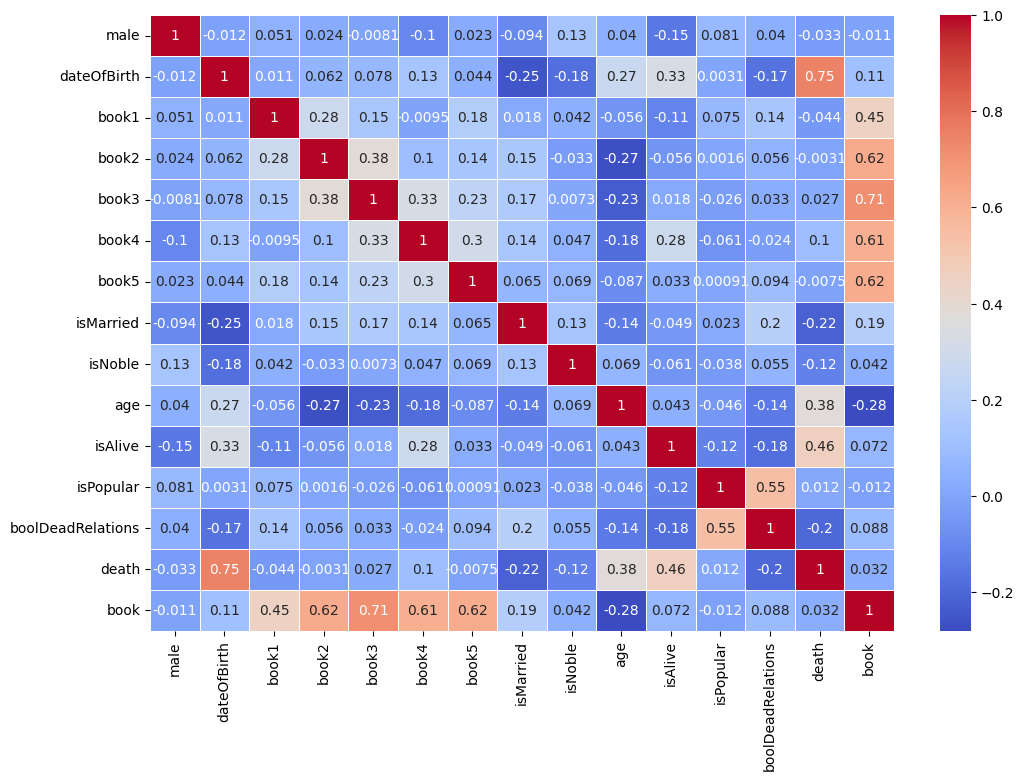

In [ ]:
num_data = data_train.drop(['simple_culture', 'title'], axis=1)
corr_matrix = num_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [ ]:
pd.crosstab(data_train['title'], data_train['isAlive'])

isAlive,0,1
title,,
Acorn Hall,0,1
Archmaester,0,21
Ashford,0,2
Banefort,0,1
Big BucketThe Wull,0,1
...,...,...
Wraith,1,0
Wyndhall,0,1
Yronwood,0,2


In [ ]:
pd.crosstab(data_train['simple_culture'], data_train['isAlive'])

isAlive,0,1
simple_culture,,
Andal,0,2
Astapori,3,1
Braavosi,1,39
Crannogmen,0,2
Dornish,1,20
Dothraki,5,12
Free Folk,16,40
Ghiscari,2,16
Ironborn,10,81


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


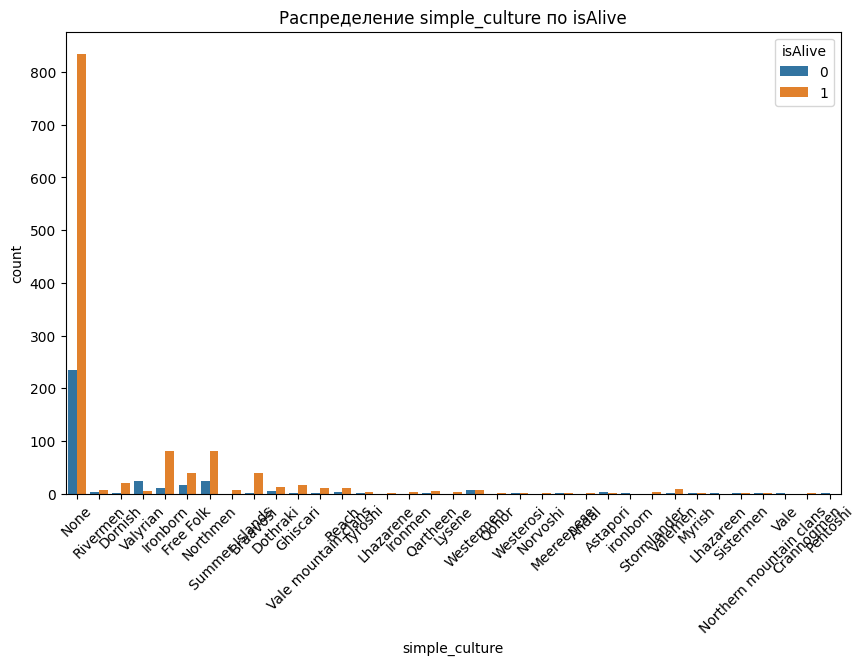

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='simple_culture', hue='isAlive', data=data_train)
plt.title('Распределение simple_culture по isAlive')
plt.xticks(rotation=45)
plt.show()


Проанализируем целевую переменную

In [ ]:
data_train['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


Классы не сбалансированы

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               1557 non-null   int64  
 1   book1              1557 non-null   int64  
 2   book2              1557 non-null   int64  
 3   book3              1557 non-null   int64  
 4   book4              1557 non-null   int64  
 5   book5              1557 non-null   int64  
 6   isMarried          1557 non-null   int64  
 7   isNoble            1557 non-null   int64  
 8   age                1557 non-null   float64
 9   isAlive            1557 non-null   int64  
 10  isPopular          1557 non-null   int64  
 11  boolDeadRelations  1557 non-null   int64  
 12  death              1557 non-null   int64  
 13  book               1557 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 214.8 KB


In [ ]:
data_train.drop(['dateOfBirth', 'simple_culture'], axis=1, inplace=True)
data_test.drop(['dateOfBirth', 'simple_culture'], axis=1, inplace=True)

In [ ]:
data_train.drop(['title'], axis=1, inplace=True)
data_test.drop(['title'], axis=1, inplace=True)

In [ ]:
X = data_train.drop('isAlive', axis=1)
y = data_train['isAlive']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle=True)

##Обучение моделей

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Обучим модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
logistic_regression = LogisticRegression(C=1)

logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
gaussian_process = GaussianProcessClassifier(random_state=42)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC(kernel='rbf', C=1.0, class_weight='balanced')
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')

ada_boost.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gaussian_process.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)


ada_boost.predict(X_test)
random_forest.predict(X_test)
gaussian_process.predict(X_test)
nb.predict(X_test)
knn.predict(X_test)
svc.predict(X_test)
decision_tree.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8590


In [ ]:
X = data.drop('isAlive', axis=1)
y = data['isAlive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle=True)

logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy_score(y_train, logistic_regression.predict(X_train)))
print("Accuracy : %.4f" % accuracy)

NameError: name 'data' is not defined

In [ ]:
y_pred_1 = ada_boost.predict(X_test)
y_pred_2 = random_forest.predict(X_test)
y_pred_3 = gaussian_process.predict(X_test)
y_pred_4 = nb.predict(X_test)
y_pred_5 = knn.predict(X_test)
y_pred_6 = svc.predict(X_test)
y_pred_7 = decision_tree.predict(X_test)

accuracy_1 = accuracy_score(y_test, y_pred_1)
accuracy_2 = accuracy_score(y_test, y_pred_2)
accuracy_3 = accuracy_score(y_test, y_pred_3)
accuracy_4 = accuracy_score(y_test, y_pred_4)
accuracy_5 = accuracy_score(y_test, y_pred_5)
accuracy_6 = accuracy_score(y_test, y_pred_6)
accuracy_7 = accuracy_score(y_test, y_pred_7)

print("Accuracy AdaBoost : %.4f" % accuracy_1)
print("Accuracy RandomForest: %.4f" % accuracy_2)
print("Accuracy GP: %.4f" % accuracy_3)
print("Accuracy GNB: %.4f" % accuracy_4)
print("Accuracy KNN: %.4f" % accuracy_5)
print("Accuracy SVC: %.4f" % accuracy_6)
print("Accuracy DecisionTree: %.4f" % accuracy_7)

Accuracy AdaBoost : 0.8558
Accuracy RandomForest: 0.7628
Accuracy GP: 0.8269
Accuracy GNB: 0.8462
Accuracy KNN: 0.7340
Accuracy SVC: 0.7019
Accuracy DecisionTree: 0.5801
